In [58]:

import numpy as np
import pandas as pd
import io
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from numpy import unique
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline, Pipeline
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn import svm
from sklearn import preprocessing
from numpy import array
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.impute import KNNImputer
from sklearn.utils.multiclass import unique_labels


pd.options.display.max_columns = None
from google.colab import files
uploaded = files.upload()




In [2]:
import io
df = pd.read_csv(io.BytesIO(uploaded["fighters.csv"]))
df.head()

,name,wins,looses,draws,ko_rate,stance,age,height,reach,country
0,Azizbek Abdumuxtar Abdugofurov,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,Uzbekistan
1,Franco Fernando Altamiranda,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,Argentina
2,Joaquin Saul Alvarez,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,"Venezuela, Bolivarian Republic of"
3,Saul Alvarez,54,1,2,63.2%,Orthodox,32,5.74 ft (1.75 m),70.47 inches (179 cm),Mexico
4,Sukru Altay,0,0,0,0%,Orthodox,38,Unknown,Unknown,Germany


DROP THE COLUMN "COUNTRY" 

In [3]:
df.drop('country',inplace=True,axis=1)


 REPLACE THE "UNKNOWN" WITH 0  IN THE ENTIRETY OF THE DATASET AND WE CLEAN SOME COLUMNS


In [4]:
df=df.replace('Unknown','0')
df['ko_rate'] = df['ko_rate'].str.replace('%', ' ')

columns_to_convert = ['wins', 'looses', 'draws', 'ko_rate', 'age']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
df[columns_to_convert] = df[columns_to_convert].fillna(0.0)
df[columns_to_convert] = df[columns_to_convert].astype(float)


FROM THE "HEIGHT" THE METERS ARE EXTRACTED

In [5]:
def extract_meters(s):
    if s == '0':
        return 0.0
    else:
        try:
            start = s.index("(") + 1
            end = s.index(" m)")
            return float(s[start:end].strip())
        except ValueError:
            return None

df['height'] = df['height'].apply(extract_meters)


FROM THE "REACH"  THE CENTIMETERS ARE EXTRACTED

In [6]:
def extract_centimeters(s):
 if s == "0":
  return 0.0
 else:
  start = s.find("(") + 1
  end = s.find(" ", start)
  cm = float(s[start:end])
  return cm
df["reach"] = df["reach"].apply(extract_centimeters)




 THE "STANCE" IS ENCODED

In [7]:
df1=pd.get_dummies(df,columns=['stance'],drop_first=True)


In [8]:
df1

,name,wins,looses,draws,ko_rate,age,height,reach,stance_Orthodox,stance_Southpaw
0,Azizbek Abdumuxtar Abdugofurov,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1,0
1,Franco Fernando Altamiranda,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1,0
2,Joaquin Saul Alvarez,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1,0
3,Saul Alvarez,54.0,1.0,2.0,63.2,32.0,1.75,179.0,1,0
4,Sukru Altay,0.0,0.0,0.0,0.0,38.0,0.00,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
2755,Zaur Abdullaev,8.0,1.0,0.0,50.0,28.0,1.75,0.0,1,0
2756,arthur abraham,47.0,6.0,0.0,56.6,42.0,1.75,183.0,1,0
2757,victor abraham,24.0,15.0,0.0,20.5,66.0,1.74,178.0,1,0
2758,reiya abe,16.0,2.0,1.0,42.1,29.0,0.00,0.0,0,1


BOXPLOT OF COLUMN AGE

221.0

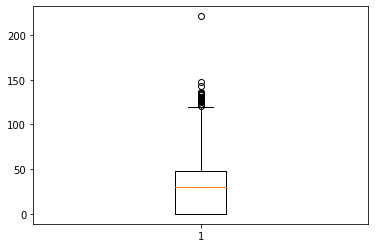

In [9]:
data=df1['age']
plt.boxplot(data)
data.max()

THE AGES THAT ARE OVER 60 ARE REPLACED WITH THE MEAN OF THE REST OF THE AGES




In [10]:
k = df1['age']
S_age = k[(k <= 60.0) & (k > 0.0)].sum()
C_age = k[(k <= 60.0) & (k > 0.0)].count()

MEAN_AGE=S_age/C_age
MEAN_AGE=round(MEAN_AGE,1)
df1['age'] = df1['age'].apply(lambda x: MEAN_AGE if x >= 60 else x)
df1['age'] = df1['age'].apply(lambda x: MEAN_AGE if x <= 10 else x)
df1

,name,wins,looses,draws,ko_rate,age,height,reach,stance_Orthodox,stance_Southpaw
0,Azizbek Abdumuxtar Abdugofurov,0.0,0.0,0.0,0.0,36.1,0.00,0.0,1,0
1,Franco Fernando Altamiranda,0.0,0.0,0.0,0.0,36.1,0.00,0.0,1,0
2,Joaquin Saul Alvarez,0.0,0.0,0.0,0.0,36.1,0.00,0.0,1,0
3,Saul Alvarez,54.0,1.0,2.0,63.2,32.0,1.75,179.0,1,0
4,Sukru Altay,0.0,0.0,0.0,0.0,38.0,0.00,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
2755,Zaur Abdullaev,8.0,1.0,0.0,50.0,28.0,1.75,0.0,1,0
2756,arthur abraham,47.0,6.0,0.0,56.6,42.0,1.75,183.0,1,0
2757,victor abraham,24.0,15.0,0.0,20.5,36.1,1.74,178.0,1,0
2758,reiya abe,16.0,2.0,1.0,42.1,29.0,0.00,0.0,0,1


In [11]:
k = df1['height']
S_age = k[ k > 0.0].sum()
C_age = k[k > 0.0].count()

MEAN_AGE=S_age/C_age
MEAN_AGE=round(MEAN_AGE,1)

df1['height'] = df1['height'].apply(lambda x: MEAN_AGE if x == 0.00 else x)


In [12]:
k = df1['reach']
S_age = k[ k > 0.0].sum()
C_age = k[k > 0.0].count()

MEAN_AGE=S_age/C_age
MEAN_AGE=round(MEAN_AGE,1)

df1['reach'] = df1['reach'].apply(lambda x: MEAN_AGE if x == 0 else x)

In [13]:
df1

,name,wins,looses,draws,ko_rate,age,height,reach,stance_Orthodox,stance_Southpaw
0,Azizbek Abdumuxtar Abdugofurov,0.0,0.0,0.0,0.0,36.1,1.80,182.1,1,0
1,Franco Fernando Altamiranda,0.0,0.0,0.0,0.0,36.1,1.80,182.1,1,0
2,Joaquin Saul Alvarez,0.0,0.0,0.0,0.0,36.1,1.80,182.1,1,0
3,Saul Alvarez,54.0,1.0,2.0,63.2,32.0,1.75,179.0,1,0
4,Sukru Altay,0.0,0.0,0.0,0.0,38.0,1.80,182.1,1,0
...,...,...,...,...,...,...,...,...,...,...
2755,Zaur Abdullaev,8.0,1.0,0.0,50.0,28.0,1.75,182.1,1,0
2756,arthur abraham,47.0,6.0,0.0,56.6,42.0,1.75,183.0,1,0
2757,victor abraham,24.0,15.0,0.0,20.5,36.1,1.74,178.0,1,0
2758,reiya abe,16.0,2.0,1.0,42.1,29.0,1.80,182.1,0,1


SOME PLOTS

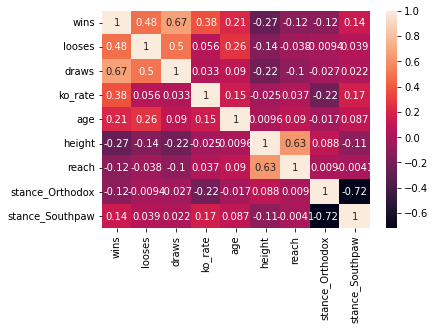

In [14]:
corr_matrix=df1.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [15]:
'''sn.barplot(x = df1['stance_Orthodox'], y = df1['wins'])
plt.xticks(rotation = 90)
plt.show()'''

"sn.barplot(x = df1['stance_Orthodox'], y = df1['wins'])\nplt.xticks(rotation = 90)\nplt.show()"

In [16]:
'''sn.barplot(x = df1['stance_Southpaw'], y = df1['wins'])
plt.xticks(rotation = 90)
plt.show()'''

"sn.barplot(x = df1['stance_Southpaw'], y = df1['wins'])\nplt.xticks(rotation = 90)\nplt.show()"

 A NEW COLUMN WITH THE LAST NAMES OF THE PLAYERS IS CREATED

In [17]:
def extract_last_name(name):
    if ' JR' in name.upper():
        name = name[:-3]
    return name.split()[-1]
df1['last_name'] = df1['name'].apply(extract_last_name)
df1['last_name'] = df1['last_name'].str.upper()



In [18]:


from google.colab import files
uploaded = files.upload()

Saving popular_matches.csv to popular_matches (9).csv


In [19]:
popular_matches = pd.read_csv(io.BytesIO(uploaded["popular_matches.csv"]))


In [20]:
popular_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        152 non-null    object 
 1   place                                       152 non-null    object 
 2   opponent_1                                  152 non-null    object 
 3   opponent_2                                  152 non-null    object 
 4   opponent_1_estimated_punch_power            152 non-null    int64  
 5   opponent_2_estimated_punch_power            152 non-null    int64  
 6   opponent_1_estimated_punch_resistance       150 non-null    float64
 7   opponent_2_estimated_punch_resistance       144 non-null    float64
 8   opponent_1_estimated_ability_to_take_punch  151 non-null    float64
 9   opponent_2_estimated_ability_to_take_punch  145 non-null    float64
 10  opponent_1_rou

 COLUMNS "DATE"  AND "PLACE" ARE REMOVED  AS THEY DO NOT PLAY A ROLE IN THE  PREDICTIONS




In [21]:
popular_matches=popular_matches.drop(columns=['date','place'])

REPLACE THE MISSING VALUES WITH THE MEAN OF THE REST

In [22]:
popular_matches['opponent_1'] = popular_matches['opponent_1'].str.upper()
popular_matches['opponent_2'] = popular_matches['opponent_2'].str.upper()



list2=[ 'opponent_1_estimated_punch_power',
        'opponent_2_estimated_punch_power',
        'opponent_1_estimated_punch_resistance',
        'opponent_2_estimated_punch_resistance',
        'opponent_1_estimated_ability_to_take_punch',
        'opponent_2_estimated_ability_to_take_punch', 'opponent_1_rounds_boxed',
        'opponent_2_rounds_boxed', 'opponent_1_round_ko_percentage',
        'opponent_2_round_ko_percentage', 'opponent_1_has_been_ko_percentage',
        'opponent_2_has_been_ko_percentage', 'opponent_1_avg_weight',
        'opponent_2_avg_weight' ]


for i in list2 : 
  mean_value=popular_matches[i].mean()
  popular_matches.fillna(value=round(mean_value,2), inplace=True)
popular_matches[['opponent_1_estimated_punch_power', 'opponent_2_estimated_punch_power', 'opponent_1_rounds_boxed']] = popular_matches[['opponent_1_estimated_punch_power', 'opponent_2_estimated_punch_power', 'opponent_1_rounds_boxed']].astype(float)


CREATE COLUMNS WITH THE LAST NAMES OF THE ATHLETES

In [23]:

popular_matches['last_name_1'] = popular_matches['opponent_1'].apply(extract_last_name)
popular_matches['last_name_2'] = popular_matches['opponent_2'].apply(extract_last_name)

FIND THE WINNER 

In [24]:
matrix =popular_matches['verdict']


j=0
k=0
for i in matrix :
  
  all_words = i.split()
  first_word= all_words[0]
  

  matrix[j]=first_word
  j=j+1

def take_the_opponents():
    list_name_1, list_name_2 = [], []
    for i in range(popular_matches.shape[0]):
        name_opponent_12 = popular_matches['last_name_1'][i]
        name_opponent_23 = popular_matches['last_name_2'][i]

        list_name_1.append(name_opponent_12)
        list_name_2.append(name_opponent_23)
    
    return list_name_1, list_name_2

list_name_opponent_12, list_name_opponent_23 = take_the_opponents()

<ipython-input-24-7b4ae214fa5d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matrix[j]=first_word


CREATE THE NEW COLUMNS THAT WILL BE A PART OF THE FINAL DATASET

In [25]:


list_columns_1_str = ['wins_1', 'looses_1', 'draws_1', 'ko_rate_1', 'age_1','height_1', 'reach_1', 'stance_Orthodox_1', 'stance_Southpaw_1']

list_columns_2_str = ['wins_2', 'looses_2', 'draws_2', 'ko_rate_2', 'age_2','height_2', 'reach_2', 'stance_Orthodox_2', 'stance_Southpaw_2']

list_columns_1_str
    
   

['wins_1',
 'looses_1',
 'draws_1',
 'ko_rate_1',
 'age_1',
 'height_1',
 'reach_1',
 'stance_Orthodox_1',
 'stance_Southpaw_1']

CONNECTION OF THE DATASETS

In [26]:


def features_1(name):
    row = df1.loc[df1['last_name'] ==name]
    row_values = row[row.columns].values

    if row_values.shape[0] == 1:
        return row_values[0][1:]
    else:
        return np.zeros(9, dtype=float)
def full_DATA():
    columns_1 = [features_1(name) for name in list_name_opponent_12]
    columns_2 = [features_1(name) for name in list_name_opponent_23]
    
    for i in range(len(list_columns_1_str)):
        popular_matches[list_columns_1_str[i]] = [col[i] for col in columns_1]
    
    for i in range(len(list_columns_2_str)):
        popular_matches[list_columns_2_str[i]] = [col[i] for col in columns_2]
    
    return popular_matches
df1_and_pm=full_DATA()
df1_and_pm    



,opponent_1,opponent_2,opponent_1_estimated_punch_power,opponent_2_estimated_punch_power,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_2_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_2_rounds_boxed,opponent_1_round_ko_percentage,opponent_2_round_ko_percentage,opponent_1_has_been_ko_percentage,opponent_2_has_been_ko_percentage,opponent_1_avg_weight,opponent_2_avg_weight,verdict,last_name_1,last_name_2,wins_1,looses_1,draws_1,ko_rate_1,age_1,height_1,reach_1,stance_Orthodox_1,stance_Southpaw_1,wins_2,looses_2,draws_2,ko_rate_2,age_2,height_2,reach_2,stance_Orthodox_2,stance_Southpaw_2
0,VASYL LOMACHENKO,LUKE CAMPBELL,72.0,72.0,73.90,60.50,78.0,73.00,119.0,130.00,8.40,12.31,0.00,0.00,127.11,135.24,Lomachenko,LOMACHENKO,CAMPBELL,14.0,2.0,0.0,62.5,34.0,1.68,166.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,ORLANDO FIORDIGIGLIO,SAM EGGINGTON,59.0,59.0,55.40,54.50,68.0,66.00,200.0,177.00,6.50,8.47,3.03,6.25,152.50,148.93,Eggington,FIORDIGIGLIO,EGGINGTON,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,28.0,7.0,0.0,48.6,28.0,1.80,182.1,1.0,0.0
2,GENNADY GOLOVKIN,SERGIY DEREVYANCHENKO,82.0,82.0,68.00,63.30,84.0,75.00,200.0,81.00,17.50,12.35,0.00,0.00,159.66,164.04,Golovkin,GOLOVKIN,DEREVYANCHENKO,41.0,1.0,1.0,83.7,40.0,1.79,178.0,1.0,0.0,13.0,2.0,0.0,66.7,36.0,1.70,171.0,1.0,0.0
3,CHAZZ WITHERSPOON,OLEKSANDR USYK,69.0,69.0,59.60,68.90,79.0,80.00,182.0,125.00,15.93,9.60,4.76,66.29,292.71,200.10,Usyk,WITHERSPOON,USYK,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,18.0,0.0,0.0,72.2,35.0,1.90,182.1,0.0,1.0
4,EBENEZER TETTEH,DANIEL DUBOIS,46.0,46.0,66.29,44.40,50.0,69.00,38.0,39.00,23.68,30.77,0.00,0.00,178.67,230.38,Dubois,TETTEH,DUBOIS,9.0,1.0,0.0,90.0,36.1,1.80,182.1,0.0,0.0,15.0,1.0,0.0,87.5,25.0,1.94,182.1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,THEOPHILUS TETTEH,ANTHONY FOWLER,56.0,56.0,41.70,45.70,67.0,60.00,147.0,65.00,6.12,13.85,8.00,66.29,154.88,155.90,Fowler,TETTEH,FOWLER,9.0,1.0,0.0,90.0,36.1,1.80,182.1,0.0,0.0,14.0,1.0,0.0,73.3,31.0,1.80,182.1,1.0,0.0
148,DEONTAY WILDER,TYSON FURY,88.0,88.0,63.90,66.90,83.0,86.00,143.0,186.00,28.67,10.75,0.00,0.00,242.40,247.50,Fury,WILDER,FURY,42.0,1.0,1.0,93.2,36.0,2.00,211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
149,SCOTT QUIGG,JONO CARROLL,75.0,75.0,63.40,52.20,76.0,63.00,200.0,122.00,13.00,66.29,0.00,0.00,124.80,133.43,Carroll,QUIGG,CARROLL,35.0,3.0,2.0,65.0,33.0,1.73,182.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
150,JOE HUGHES,SAM MAXWELL,57.0,57.0,52.30,66.29,65.0,66.29,182.0,66.29,3.85,66.29,0.00,0.00,141.86,66.29,Maxwell,HUGHES,MAXWELL,16.0,4.0,2.0,8.7,32.0,1.80,182.1,0.0,1.0,0.0,0.0,0.0,0.0,36.1,1.80,182.1,1.0,0.0


THE NEW DATASET

In [27]:
df1_and_pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   opponent_1                                  152 non-null    object 
 1   opponent_2                                  152 non-null    object 
 2   opponent_1_estimated_punch_power            152 non-null    float64
 3   opponent_2_estimated_punch_power            152 non-null    float64
 4   opponent_1_estimated_punch_resistance       152 non-null    float64
 5   opponent_2_estimated_punch_resistance       152 non-null    float64
 6   opponent_1_estimated_ability_to_take_punch  152 non-null    float64
 7   opponent_2_estimated_ability_to_take_punch  152 non-null    float64
 8   opponent_1_rounds_boxed                     152 non-null    float64
 9   opponent_2_rounds_boxed                     152 non-null    float64
 10  opponent_1_rou

CREATE A HEATMAP

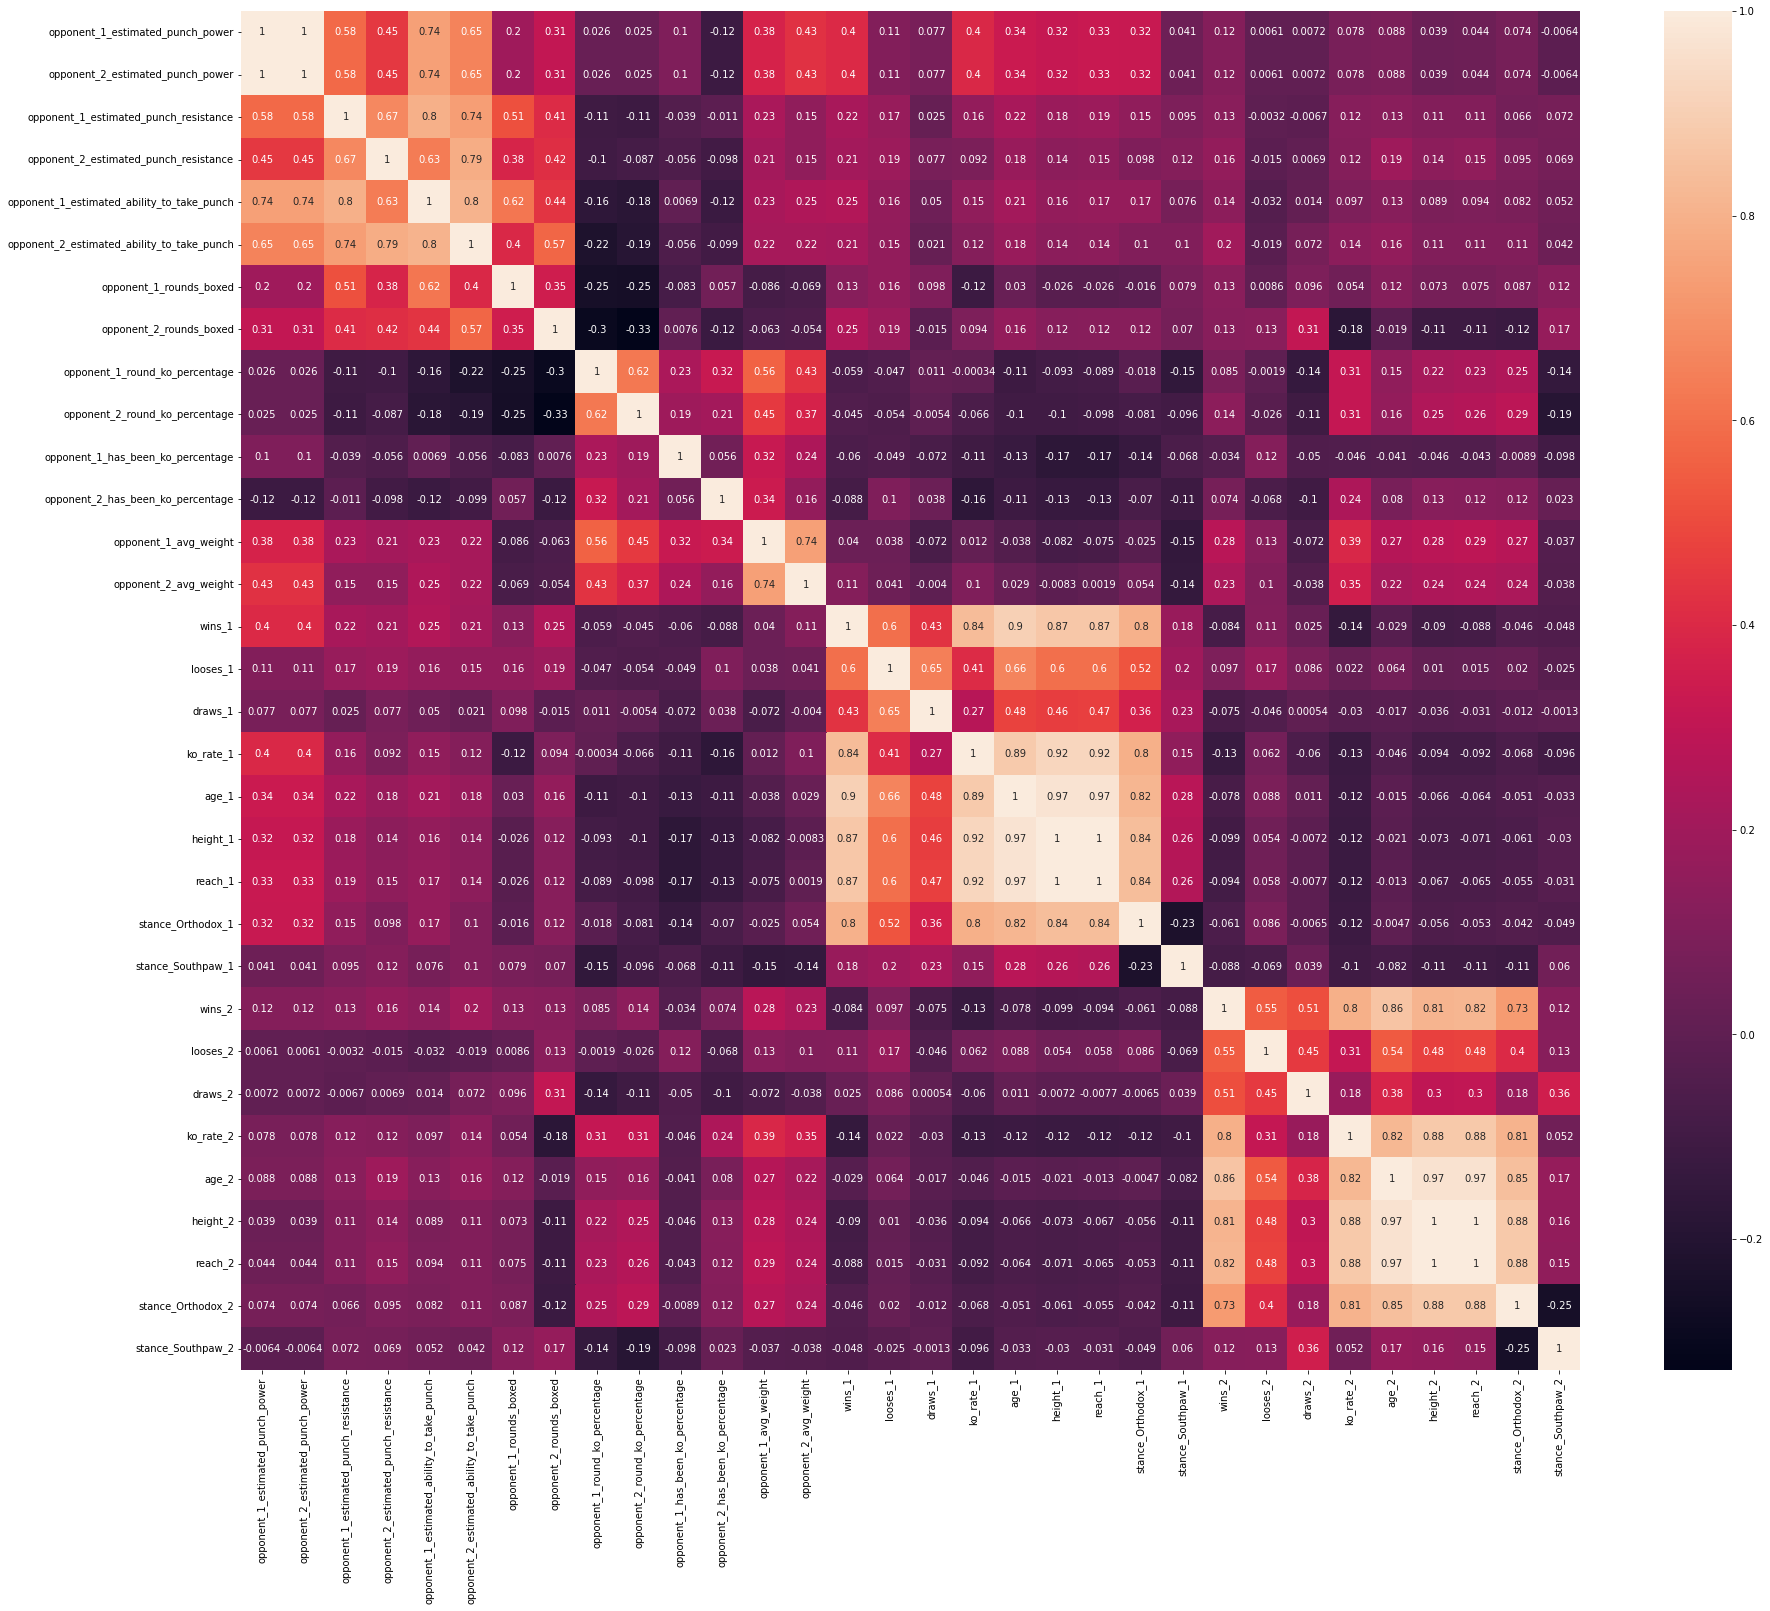

In [28]:
correlations = df1_and_pm.corr()
plt.figure(figsize=(30,25))
sn.heatmap(correlations, annot=True)
plt.show()

In [29]:
df1_and_pm['verdict'] = df1_and_pm['verdict'].str.upper()

FIND THE UNIQUE VALUES OF COLUMN VERDICT

In [30]:



unique_values =df1_and_pm["verdict"].unique()

print(unique_values)


['LOMACHENKO' 'EGGINGTON' 'GOLOVKIN' 'USYK' 'DUBOIS' 'SPENCE' 'HANEY'
 'FURY' 'POVETKIN' 'BETERBIEV' 'TAYLOR' 'FITZGERALD' 'CHISORA' 'OLATUNJI'
 'DRAW' 'ALVAREZ' 'TYSON' 'ALI' 'LEONARD' 'MAYWEATHER' 'WILDER' 'JOSHUA'
 'RUIZ' 'SMITH' 'UNKNOWN' 'PERALTA' 'PARKER' 'LINARES' 'BELLEW' 'WARD'
 'CLEVERLY' 'PORTER' 'FRAMPTON' 'INOUE' 'CAMPBELL' 'WARRINGTON' 'WHYTE'
 'DIXON' 'PRICE' 'PACQUIAO' 'GETHING' 'EUBANK' 'BENAVIDEZ' 'DAVIES'
 'FEIGENBUTZ' 'KOVALEV' 'CHARLO' 'MARTIN' 'GARCIA' 'FOWLER' 'CARROLL'
 'MAXWELL' 'LOPEZ']


TURN THE VALUES OF THE COLUMN VERDICT FROM  CATEGORICAL TO NUMERICAL

In [31]:
def determine_winner(row):
    verdict = row['verdict']
    opponent1 = row['last_name_1']
    opponent2 = row['last_name_2']
    if verdict == opponent2:
        return 2
    elif verdict == opponent1:
        return 1
    else: 
        return 0
       
     
  

df1_and_pm['winner'] = df1_and_pm.apply(determine_winner, axis=1)



In [32]:
df1_and_pm

,opponent_1,opponent_2,opponent_1_estimated_punch_power,opponent_2_estimated_punch_power,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_2_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_2_rounds_boxed,opponent_1_round_ko_percentage,opponent_2_round_ko_percentage,opponent_1_has_been_ko_percentage,opponent_2_has_been_ko_percentage,opponent_1_avg_weight,opponent_2_avg_weight,verdict,last_name_1,last_name_2,wins_1,looses_1,draws_1,ko_rate_1,age_1,height_1,reach_1,stance_Orthodox_1,stance_Southpaw_1,wins_2,looses_2,draws_2,ko_rate_2,age_2,height_2,reach_2,stance_Orthodox_2,stance_Southpaw_2,winner
0,VASYL LOMACHENKO,LUKE CAMPBELL,72.0,72.0,73.90,60.50,78.0,73.00,119.0,130.00,8.40,12.31,0.00,0.00,127.11,135.24,LOMACHENKO,LOMACHENKO,CAMPBELL,14.0,2.0,0.0,62.5,34.0,1.68,166.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1
1,ORLANDO FIORDIGIGLIO,SAM EGGINGTON,59.0,59.0,55.40,54.50,68.0,66.00,200.0,177.00,6.50,8.47,3.03,6.25,152.50,148.93,EGGINGTON,FIORDIGIGLIO,EGGINGTON,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,28.0,7.0,0.0,48.6,28.0,1.80,182.1,1.0,0.0,2
2,GENNADY GOLOVKIN,SERGIY DEREVYANCHENKO,82.0,82.0,68.00,63.30,84.0,75.00,200.0,81.00,17.50,12.35,0.00,0.00,159.66,164.04,GOLOVKIN,GOLOVKIN,DEREVYANCHENKO,41.0,1.0,1.0,83.7,40.0,1.79,178.0,1.0,0.0,13.0,2.0,0.0,66.7,36.0,1.70,171.0,1.0,0.0,1
3,CHAZZ WITHERSPOON,OLEKSANDR USYK,69.0,69.0,59.60,68.90,79.0,80.00,182.0,125.00,15.93,9.60,4.76,66.29,292.71,200.10,USYK,WITHERSPOON,USYK,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,18.0,0.0,0.0,72.2,35.0,1.90,182.1,0.0,1.0,2
4,EBENEZER TETTEH,DANIEL DUBOIS,46.0,46.0,66.29,44.40,50.0,69.00,38.0,39.00,23.68,30.77,0.00,0.00,178.67,230.38,DUBOIS,TETTEH,DUBOIS,9.0,1.0,0.0,90.0,36.1,1.80,182.1,0.0,0.0,15.0,1.0,0.0,87.5,25.0,1.94,182.1,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,THEOPHILUS TETTEH,ANTHONY FOWLER,56.0,56.0,41.70,45.70,67.0,60.00,147.0,65.00,6.12,13.85,8.00,66.29,154.88,155.90,FOWLER,TETTEH,FOWLER,9.0,1.0,0.0,90.0,36.1,1.80,182.1,0.0,0.0,14.0,1.0,0.0,73.3,31.0,1.80,182.1,1.0,0.0,2
148,DEONTAY WILDER,TYSON FURY,88.0,88.0,63.90,66.90,83.0,86.00,143.0,186.00,28.67,10.75,0.00,0.00,242.40,247.50,FURY,WILDER,FURY,42.0,1.0,1.0,93.2,36.0,2.00,211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2
149,SCOTT QUIGG,JONO CARROLL,75.0,75.0,63.40,52.20,76.0,63.00,200.0,122.00,13.00,66.29,0.00,0.00,124.80,133.43,CARROLL,QUIGG,CARROLL,35.0,3.0,2.0,65.0,33.0,1.73,182.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2
150,JOE HUGHES,SAM MAXWELL,57.0,57.0,52.30,66.29,65.0,66.29,182.0,66.29,3.85,66.29,0.00,0.00,141.86,66.29,MAXWELL,HUGHES,MAXWELL,16.0,4.0,2.0,8.7,32.0,1.80,182.1,0.0,1.0,0.0,0.0,0.0,0.0,36.1,1.80,182.1,1.0,0.0,2


KEEP THE LABELS

In [33]:
winner_2 = df1_and_pm.pop('winner')


REMOVE ALL THE COLUMNS  WITH CATEGORICAL VALUES

In [34]:
df1_and_pm=popular_matches.drop(columns=['last_name_1', 'last_name_2', 'opponent_1', 'opponent_2','verdict'])


STANDARDIZE AND SPLIT

In [38]:
x_train, x_test, y_train, y_test = train_test_split(df1_and_pm, winner_2, test_size = 0.2)
scaler = StandardScaler()
scaler.fit(x_train)
X_train=scaler.transform(x_train)
X_test=scaler.transform(x_test)

DEF TO PLOT CONFUSION MATRIX FOR MULTICLASS

In [41]:

def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_test, y_pred)

    classes = classes[unique_labels(y_test, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
   
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
        
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(winner_2))-0.5)
    plt.ylim(len(np.unique(winner_2))-0.5, -0.5)
    return ax

MODEL:RANDOM_FOREST_CLASSIFIER( PARAMETERS : n_estimators = 1000, max_depth = 3)

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.83      0.56      0.67         9
           2       0.76      0.95      0.84        20

    accuracy                           0.77        31
   macro avg       0.53      0.50      0.50        31
weighted avg       0.73      0.77      0.74        31



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


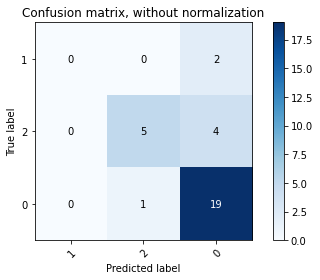

Train score: 0.9090909090909091
Test score: 0.7741935483870968
Accuracy: 0.7741935483870968


In [42]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = 3)

model.fit(x_train, y_train)

train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
y_pred = model.predict(x_test)
errors = abs(y_pred - y_test)
accuracy = accuracy_score(y_test, y_pred)

print("RandomForestClassifier")

print(classification_report(y_test, y_pred))
np.set_printoptions(precision=2)
class_names = np.array(['1', '2', '0'])
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

print("Train score: %s" % train_score)
print("Test score: %s" % test_score)
print("Accuracy: %s" % accuracy)


MODEL:RANDOM_FOREST_CLASSIFIER( PARAMETERS : n_estimators = 1000, max_depth = 6)

RandomForestClassifier
Train score: 0.9834710743801653
Test score: 0.7096774193548387
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.56      0.56      0.56         9
           2       0.77      0.85      0.81        20

    accuracy                           0.71        31
   macro avg       0.44      0.47      0.46        31
weighted avg       0.66      0.71      0.68        31

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.56      0.56      0.56         9
           2       0.77      0.85      0.81        20

    accuracy                           0.71        31
   macro avg       0.44      0.47      0.46        31
weighted avg       0.66      0.71      0.68        31



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

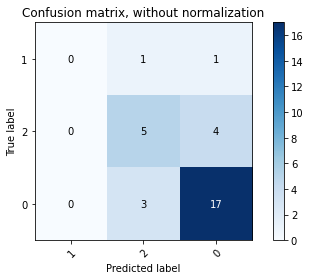

In [43]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = 5)

model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
y_pred = model.predict(x_test)
errors = abs(y_pred - y_test)
accuracy = accuracy_score(y_test, y_pred)


print("RandomForestClassifier")
print("Train score: %s" % train_score)
print("Test score: %s" % test_score)
print(classification_report(y_test, y_pred))

np.set_printoptions(precision=2)
class_names = np.array(['1', '2', '0'])

print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')



plt.show()

MODEL:RANDOM_FOREST_CLASSIFIER( PARAMETERS : n_estimators = 1000, max_depth = 2)

In [45]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = 2)

model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
y_pred = model.predict(x_test)
errors = abs(y_pred - y_test)
accuracy = accuracy_score(y_test, y_pred)



print("RandomForestClassifier")
print(classification_report(y_test, y_pred))

print("Train score: %s" % train_score)
print("Test score: %s" % test_score)



RandomForestClassifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.80      0.44      0.57         9
           2       0.73      0.95      0.83        20

    accuracy                           0.74        31
   macro avg       0.51      0.46      0.47        31
weighted avg       0.70      0.74      0.70        31

Train score: 0.8181818181818182
Test score: 0.7419354838709677


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBOOST CLASSIFIER(PARAMETERS :max_depth=2, learning_rate=0.001, n_estimators=100)

In [62]:
model = XGBClassifier(max_depth=2, learning_rate=0.001, n_estimators=100)




model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
y_pred_winner = model.predict(x_test)
accuracy = accuracy_score(y_test,  y_pred_winner)


print(" XGBClassifier")
print(classification_report(y_test, y_pred))
print("Train score: %s" % train_score)




 XGBClassifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        17
           2       0.61      1.00      0.76        28

    accuracy                           0.61        46
   macro avg       0.20      0.33      0.25        46
weighted avg       0.37      0.61      0.46        46

Train score: 0.7264150943396226


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBOOST CLASSIFIER(PARAMETERS :max_depth=4, learning_rate=0.001, n_estimators=100)

In [46]:
model = XGBClassifier(max_depth=4, learning_rate=0.001, n_estimators=100)


x_train, x_test, y_train, y_test = train_test_split(df1_and_pm, winner_2, test_size = 0.3, random_state = 15)

model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
y_pred_winner = model.predict(x_test)
accuracy = accuracy_score(y_test,  y_pred_winner)


print(" XGBClassifier")
print(classification_report(y_test, y_pred_winner))
print("Train score: %s" % train_score)



 XGBClassifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.53      0.53      0.53        15
           2       0.79      0.79      0.79        29

    accuracy                           0.67        46
   macro avg       0.44      0.44      0.44        46
weighted avg       0.67      0.67      0.67        46

Train score: 0.9716981132075472


XGBOOST CLASSIFIER(PARAMETERS :max_depth=2, learning_rate=0.003, n_estimators=1000)

In [47]:
model = XGBClassifier(max_depth=1, learning_rate=0.003, n_estimators=1000)



model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
y_pred_winner = model.predict(x_test)
accuracy = accuracy_score(y_test,  y_pred_winner)


print(" XGBClassifier")
print(classification_report(y_test, y_pred_winner))
print("Train score: %s" % train_score)



 XGBClassifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.38      0.20      0.26        15
           2       0.63      0.83      0.72        29

    accuracy                           0.59        46
   macro avg       0.34      0.34      0.33        46
weighted avg       0.52      0.59      0.54        46

Train score: 0.7830188679245284


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DECISION_TREE_CLASSIFIER (PARAMETERS criterion = 'entropy',max_depth=2)




In [48]:
tree_classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)




tree_classifier.fit(x_train, y_train)

y_pred = tree_classifier.predict(x_test)

print(classification_report(y_test, y_pred))






              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.47      0.60      0.53        15
           2       0.74      0.69      0.71        29

    accuracy                           0.63        46
   macro avg       0.40      0.43      0.41        46
weighted avg       0.62      0.63      0.62        46



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DECISION_TREE_CLASSIFIER (PARAMETERS criterion = 'gini',max_depth=3)


In [49]:
tree_classifier = DecisionTreeClassifier(criterion = 'gini',max_depth=2)



tree_classifier.fit(x_train, y_train)

y_pred = tree_classifier.predict(x_test)

print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.73      0.53      0.62        15
           2       0.76      0.86      0.81        29

    accuracy                           0.74        46
   macro avg       0.66      0.63      0.64        46
weighted avg       0.74      0.74      0.73        46



SVM PAREMETERS C=1.0

In [60]:
model = svm.SVC(C=1.0)
model.fit(x_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        17
           2       0.61      1.00      0.76        28

    accuracy                           0.61        46
   macro avg       0.20      0.33      0.25        46
weighted avg       0.37      0.61      0.46        46



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM PARAMETERES C=0.01

In [54]:
model = svm.SVC(C=0.01)
model.fit(x_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        15
           2       0.63      1.00      0.77        29

    accuracy                           0.63        46
   macro avg       0.21      0.33      0.26        46
weighted avg       0.40      0.63      0.49        46



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TUNE THE RANDOM_FOREST_CLASSIFIER

In [ ]:
#tune the RandomForestClassifier

grid_RF = [{
            'RF__n_estimators': [1000,1100,2000,3000],
            
             'RF__min_samples_split':[2,3,4,5,6]
            }]

estimators_RF = [('imputation',KNNImputer(n_neighbors=5)),
                 ('scale', StandardScaler()),
                 ('RF',RandomForestClassifier())
                 ]
pipeline_RF = Pipeline(estimators_RF)
kfold = StratifiedKFold(n_splits=5)
grid_search_RF = GridSearchCV(pipeline_RF, grid_RF,scoring='f1',cv=kfold)
grid_search_RF.fit(x_train,y_train.ravel())
print(grid_search_RF.best_params_)
#output:'RF__min_samples_split': 3, 'RF__n_estimators': 1000}'